### Make temperature and salinity binary files from given profiles

Make a binary file with horizontally homogeneous initial T and S conditions.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp

In [2]:
# Profiles from SVB Feb run
T_SVB = np.array([16.58,16.57,16.56,16.55,16.54,16.54,16.53,16.52,16.51,16.50,16.49,
              16.47,16.45,16.42,16.38,16.33,16.23,16.13,15.99,15.86,15.69,15.52,
              15.31,15.08,14.80,14.52,14.20,13.86,13.47,13.04,12.58,12.13,11.68,
              11.27,10.91,10.57,10.25,9.94,9.64,9.43,9.23,9.03,8.82,8.63,8.44,8.26,
              8.06,7.84,7.62,7.38,7.14,6.91,6.72,6.54,6.36,6.19,6.04,5.91,5.78,5.65,
              5.53,5.40,5.27,5.13,5.00,4.85,4.70,4.56,4.41,4.27,4.13,3.99,3.84,3.68,
              3.51,3.33,3.16,2.98,2.80,2.65,2.49,2.34,2.20,2.09,2.03,1.99,1.94,1.89,
              1.85,1.80,1.75,1.70,1.65,1.61,1.56,1.51,1.46,1.40,1.41,1.42])
S_SVB = np.array([33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,
              33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.64,33.64,33.64,33.65,
              33.65,33.66,33.66,33.67,33.69,33.70,33.72,33.75,33.77,33.78,33.80,
              33.82,33.84,33.86,33.88,33.91,33.94,33.96,33.99,34.01,34.04,34.07,
              34.09,34.12,34.15,34.16,34.17,34.18,34.19,34.20,34.23,34.25,34.27,
              34.29,34.31,34.32,34.34,34.35,34.36,34.37,34.38,34.39,34.40,34.41,
              34.42,34.44,34.45,34.47,34.48,34.49,34.51,34.52,34.54,34.55,34.56,
              34.57,34.58,34.59,34.60,34.61,34.62,34.63,34.64,34.65,34.66,34.67,
              34.68,34.68,34.68,34.68,34.68,34.68,34.68,34.69,34.69,34.69,34.69,
              34.71])
delR_SVB = np.array([2, 2, 2, 2, 2, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.5, 3.8, 4.2, 4.5,
                 4.8, 5, 5, 5, 5, 5, 5, 5.5, 5.5, 5.5, 5.5, 5.5, 6, 6.5,7, 7.5, 
                 8, 8.5, 9.2, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 15, 16, 
                 17, 18, 20,22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 27, 28, 30, 
                 30, 32, 34, 36, 38, 40, 43, 46, 50, 55, 59, 65, 70, 75, 80, 85, 
                 92, 100, 100, 100, 100, 100, 100, 105, 115, 125, 132,145, 160, 
                 170, 180, 190, 200, 210, 230, 245, 269.8,])
R_SVB_faces = np.zeros(np.shape(delR_SVB)[0]+1)
R_SVB_faces[1:] = np.cumsum(delR_SVB)
RC_SVB = (R_SVB_faces[:-1]+R_SVB_faces[1:])/2

In [3]:
# Depths from IW MITgcm config (cell centers)
delR = np.array([2.0, 2.2, 2.4, 2.7, 3.0, 3.3, 3.6, 4.0, 4.4, 
                 4.9, 5.4, 6.0, 6.6, 7.3, 8.0, 8.9, 9.8, 
                 10.8, 12.0, 13.2, 14.6, 16.1, 17.8, 19.7, 21.7, 
                 24.0, 26.5, 29.3, 32.3, 35.7, 39.4, 43.6, 48.1, 
                 53.1, 58.7, 64.8, 71.6, 79.1, 87.1, 96.3])
R_faces = np.zeros(np.shape(delR)[0]+1)
R_faces[1:] = np.cumsum(delR)
RC = (R_faces[:-1]+R_faces[1:])/2
print(f'Depths at cell centers: {RC}')

Depths at cell centers: [  1.     3.1    5.4    7.95  10.8   13.95  17.4   21.2   25.4   30.05
  35.2   40.9   47.2   54.15  61.8   70.25  79.6   89.9  101.3  113.9
 127.8  143.15 160.1  178.85 199.55 222.4  247.65 275.55 306.35 340.35
 377.9  419.4  465.25 515.85 571.75 633.5  701.7  777.05 860.15 951.85]


In [4]:
# Create interp function from original T and S and R
T_interp = sci_interp.interp1d(RC_SVB, T_SVB)
S_interp = sci_interp.interp1d(RC_SVB, S_SVB)

# Interpolate into desired depths
T = T_interp(RC)
S = S_interp(RC)

Text(0.5, 0, 'Practical salinity')

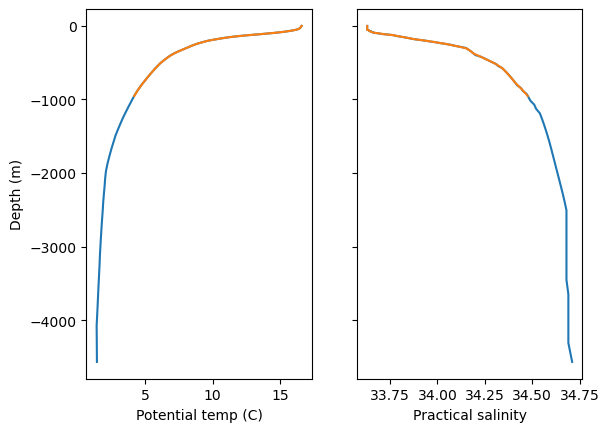

In [5]:
# Plot eveything

fig, (ax, ax2) = plt.subplots(1,2, sharey=True)
ax.plot(T_SVB,-RC_SVB)
ax.plot(T,-RC)
ax.set_xlabel('Potential temp (C)')
ax.set_ylabel('Depth (m)')

ax2.plot(S_SVB,-RC_SVB)
ax2.plot(S,-RC)
ax2.set_xlabel('Practical salinity')

In [6]:
for Tii, ii in zip(np.round(T, decimals=1), range(len(RC))):
    print(f'{Tii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

16.6, 16.6, 16.6, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 
16.5, 16.4, 16.4, 16.3, 16.1, 15.9, 15.7, 15.3, 
14.8, 14.2, 13.5, 12.6, 11.7, 11.0, 10.4, 9.7, 
9.2, 8.8, 8.4, 8.0, 7.5, 7.1, 6.7, 6.4, 
6.1, 5.8, 5.5, 5.2, 4.8, 4.5, 4.2, 

In [7]:
for Sii, ii in zip(np.round(S, decimals=1), range(len(RC))):
    print(f'{Sii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.7, 33.7, 33.7, 33.8, 33.8, 33.8, 33.9, 33.9, 
34.0, 34.0, 34.1, 34.2, 34.2, 34.2, 34.2, 34.3, 
34.3, 34.3, 34.4, 34.4, 34.4, 34.4, 34.5, 

In [8]:
# make 3D arrays of size nx x ny x nz:
nx = 240
ny = 180
nz = np.shape(RC)[0]

T_array = np.expand_dims(np.expand_dims(T, axis=1), axis=1)
T_array = T_array * np.ones((nz,ny,nx))

S_array = np.expand_dims(np.expand_dims(S, axis=1), axis=1)
S_array = S_array * np.ones((nz,ny,nx))

In [9]:
dt = np.dtype('>f8')  # float 64 big endian

# Save binary file
filename = "feb_temp_%dzlev_%dx%d.bin" %(nz,nx,ny)
fileobj = open(filename,mode='wb')
T_array.astype(dt).tofile(fileobj,"")
fileobj.close()

filename = "feb_salt_%dzlev_%dx%d.bin" %(nz,nx,ny)
fileobj = open(filename,mode='wb')
S_array.astype(dt).tofile(fileobj,"")
fileobj.close()

In [10]:
# Save open boundary binary files feb (constant in time)
dt = np.dtype('>f8')  # float 64 big endian

# Western boundary
Ss_feb = np.squeeze(S_array[:,0,:])
filename = "Ss_feb_%dx%d.bin" %(nz,nx)
fileobj = open(filename,mode='wb')
Ss_feb.astype(dt).tofile(fileobj,"")
fileobj.close()

St_feb = np.squeeze(T_array[:,0,:])
filename = "St_feb_%dx%d.bin" %(nz,nx)
fileobj = open(filename,mode='wb')
St_feb.astype(dt).tofile(fileobj,"")
fileobj.close()

In [7]:
rho1=1
rho2=2
del_rho=rho2-rho1
epsilon=del_rho/rho2
root_ep=np.sqrt(epsilon)
print(epsilon)
print(root_ep)

0.5
0.7071067811865476
